In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps

In [21]:
def filt(img, fraction):
    img = np.array(img)
    img_fft = np.fft.fft2(img)
#     img_fft_shift = np.fft.fftshift(img_fft)
    img_fft_shift = img_fft
    magnitude_spectrum = 20*np.log(1+np.abs(img_fft_shift))

    ans = img_fft_shift.copy()
    r, c = img_fft_shift.shape
    ans[int(r*fraction):int(r*(1-fraction))] = 0
    ans[:, int(c*fraction):int(c*(1-fraction))] = 0
    magnitude_spectrum1 = 20*np.log(1+np.abs(ans))

    figure = plt.figure(figsize=[10,10])
    plt.subplot(121),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Input Magnitude Spectrum'),plt.axis('off')
    plt.subplot(122),plt.imshow(magnitude_spectrum1, cmap = 'gray')
    plt.title('Output Magnitude Spectrum'),plt.axis('off')
    plt.show()
    
    return ans

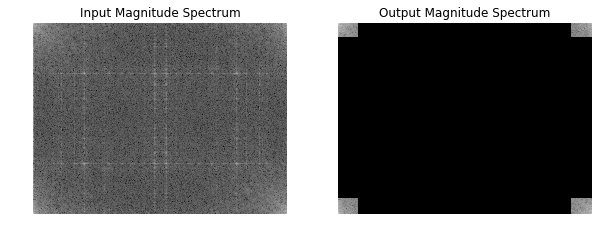

In [22]:
img = Image.open('../input_data/land.png').convert('L')
output_fft = filt(img,0.08)

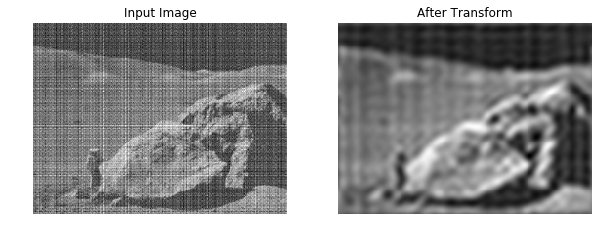

In [23]:
# ans_fft = np.fft.ifftshift(output_fft)
ans = np.fft.ifft2(output_fft)
ans = np.abs(ans)
# ans = ans.astype('uint8')

figure = plt.figure(figsize=[10,10])
plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'),plt.axis('off')
plt.subplot(122),plt.imshow(ans, cmap = 'gray')
plt.title('After Transform'),plt.axis('off')
plt.show()


<b>The Image has vertical and horizontal lines as noise so what we can do to remove it is we can <br>remove the part from the spectrum which has the lines and we can remake the image from the remaining part.<br>This will denoise the image but will result in losing the sharp details from the image.</b>